# Лабораторная работа №5. Цифровой спектральный анализ.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ
# Модуль 3. Периодограммные методы оценки СПМ

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
#%matplotlib inline

In [3]:
#%matplotlib notebook

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

## Реализация случайного процесса

Предположим, что требуется оценить СПМ случайного процесса
$${{x}_{\text{сл}}}[k]={{a}_{1}}\sin (2\pi {{f}_{1}}k\Delta t+{{\phi }_{1}})+{{a}_{2}}\sin (2\pi {{f}_{2}}k\Delta t+{{\phi }_{2}})+e[k]$$
где 
* ${{a}_{1}}=5$, ${{a}_{2}}=4$ — известные амплитуды,
* $e[k]$ — дискретный белый шум c нулевым средним и дисперсией ${{\sigma }^{2}}=9$, 
* ${{f}_{1}}=2\ \text{кГц}$, ${{f}_{2}}=4\ \text{кГц}$, ${{f}_{\text{д}}}=1/\Delta t=10\ \text{кГц}$, 
* ${\phi }_{1}$, ${\phi }_{2}$ — случайные величины с равномерным распределением на отрезке $[0,2\pi ]$.

* ```random.uniform(low=0.0, high=1.0, size=None)``` позволяет генерировать данные с равномерным распредлением на отрезке ```[low, high)```

In [4]:
phi1, phi2 = np.random.uniform(low=0.0, high=2*np.pi, size=2)
phi1, phi2

(2.4602994738514914, 5.272394461506318)

* ```random.normal(loc=0.0, scale=1.0, size=None)``` позволяет генерировать данные с распредлением Гаусса (нормальным) с дисперией $\sigma^2$ (стандартное отклонение $\sigma$ = ```scale```) и средним значением ```loc```. Далее ```noise``` - реализация дискретного белого шума.

In [5]:
N=2**8
noise = np.random.normal(scale=3, size=N)
#noise

* определим фиксированные параметры случайного сигнала

In [6]:
fs=10000
f0=2000
f1=4000
a1=5
a2=4

* Получим реализацию $x[k]$ случайного процесса для $0 \le k \le N-1$, $N=2^{8}$.

In [7]:
N=2**8
k=np.arange(N)
phi1, phi2 = np.random.uniform(low=0.0, high=2*np.pi, size=2)
noise = np.random.normal(scale=3, size=N)
x=a1*np.sin(2*np.pi*f0/fs*k+phi1) + a2*np.sin(2*np.pi*f1/fs*k+phi2) + noise

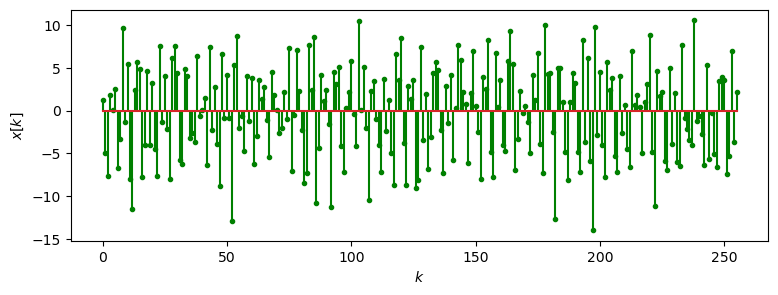

In [8]:
plt.figure(figsize=[9, 3])
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.stem(k, x, linefmt='g', markerfmt='g.')
plt.show()

## Метод периодограмм

Метод периодограмм в немодифицированном виде (метод периодограмм Шустера) основан на вычислении оценки $\hat{G}\left( f \right)$ спектральной плотности мощности случайного процесса по конечному числу отсчетов некоторой реализации $x[k],\ $ $k=0,1,\ldots \ ,N-1.$ Получаем оценку СПМ
	$$\hat{G}(f)=\frac{\Delta t}{N}{{\left| \sum\limits_{k\ =\ 0}^{N-1}{x[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$ 	
Сравнивая с формулой ДПФ $X[n]\,$последовательности этих отсчетов, можно записать (${{N}_{\text{FFT}}}\ge N$)
	$$\hat{G}(n\Delta f)=\frac{\Delta t}{N}{{\left| X[n] \right|}^{2}},\ \ \Delta f=\frac{{{f}_{\text{}}}}{{{N}_{\text{FFT}}}},$$


Приведем периодограммы, построенные по первым $N=2048$ и $N=256$ отсчетам одной из реализаций.

In [9]:
N=2**8
k=np.arange(N)
phi1, phi2 = np.random.uniform(low=0.0, high=2*np.pi, size=2)
noise = np.random.normal(scale=4, size=N)
x=a1*np.sin(2*np.pi*f0/fs*k+phi1) + a2*np.sin(2*np.pi*f1/fs*k+phi2) + noise

* построение с помощью ```np.fft.fft```

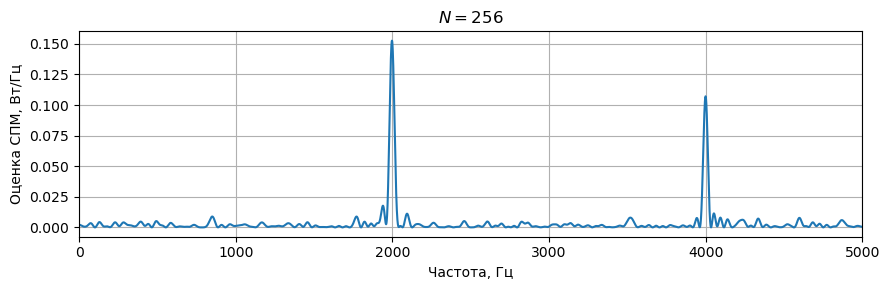

In [10]:
nfft=2**17
Xn=np.fft.fft(x, nfft)
X1 = abs(Xn)**2/N/fs
f = np.arange(X1.shape[0])/X1.shape[0] * fs

plt.figure(figsize=[9, 3])
plt.plot(f, X1)
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N = %i$" %len(x))
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

* построение с помощью ```signal.periodogram```

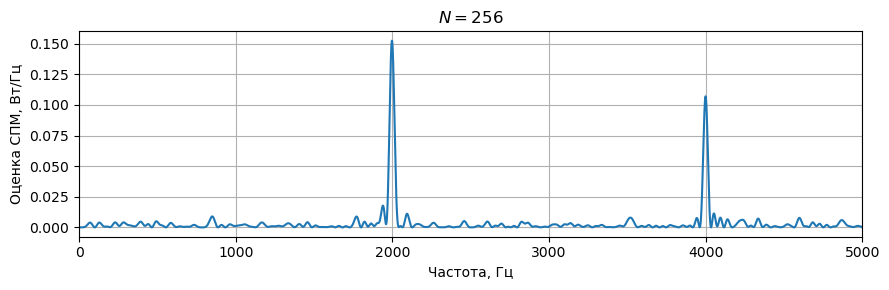

In [11]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=2**17, scaling='density')
plt.plot(f, Pxx_den/2)
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N = %i$" %len(x))
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
#plt.savefig('psd_1.svg')
plt.show()

**Примечание.** Деление на 2 в коде ```Pxx_den/2``` используется по причине того, что ```signal.periodogram``` в данном случае оценивает одностороннюю СПМ.

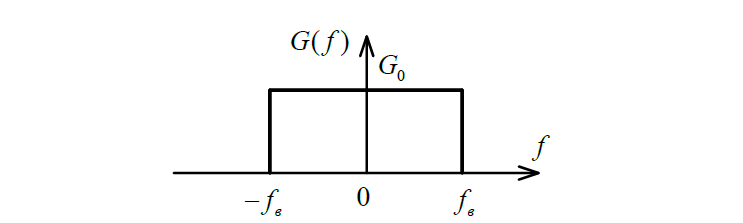
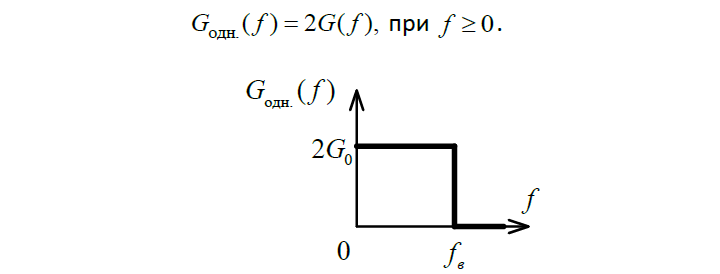

In [12]:
N=2**11
k=np.arange(N)
phi1, phi2 = np.random.uniform(low=0.0, high=2*np.pi, size=2)
noise = np.random.normal(scale=4, size=N)
x=a1*np.sin(2*np.pi*f0/fs*k+phi1) + a2*np.sin(2*np.pi*f1/fs*k+phi2) + noise

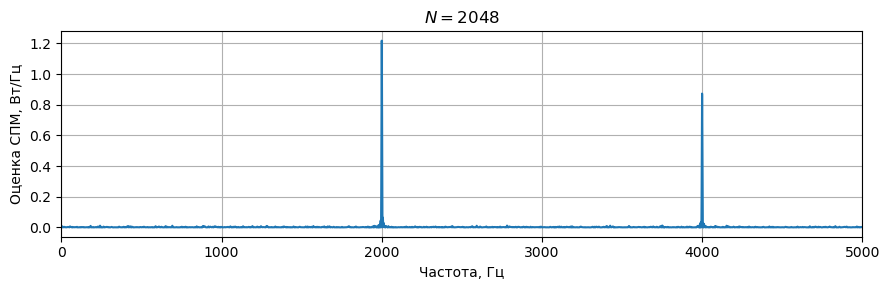

In [13]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=2**17, scaling='density')
plt.plot(f, Pxx_den/2)
plt.xlim([0, fs/2])
plt.grid()
#plt.xlim([1900, 2100])
plt.title("$N = %i$" %len(x))
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

## Дополнение нулями (Zero Padding) 

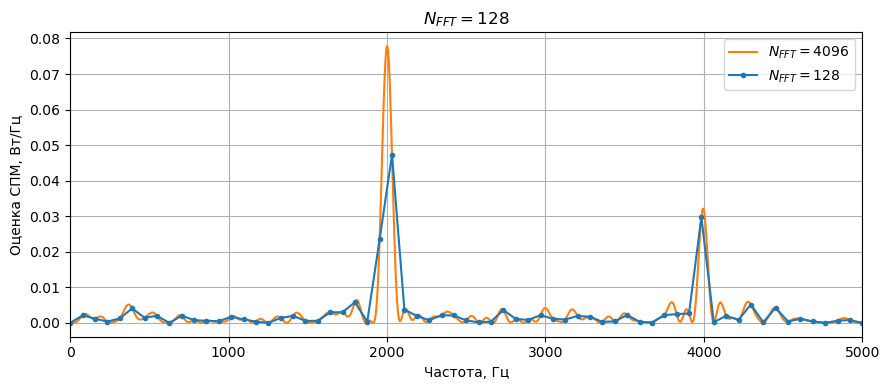

In [14]:
N=2**7
k=np.arange(N)
phi1, phi2 = np.random.uniform(low=0.0, high=2*np.pi, size=2)
noise = np.random.normal(scale=4, size=N)
x=a1*np.sin(2*np.pi*f0/fs*k+phi1) + a2*np.sin(2*np.pi*f1/fs*k+phi2) + noise


plt.figure(figsize=[9, 4])


nfft=2**12
f2, Pxx_den2 = signal.periodogram(x, fs=fs, nfft=nfft, scaling='density')
plt.plot(f2, Pxx_den2/2, 'C1-', label = "$N_{FFT} = %i$" %nfft)

nfft=2**7
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=nfft, scaling='density')
plt.plot(f, Pxx_den/2, 'C0.-', label = "$N_{FFT} = %i$" %nfft)


plt.legend()
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N_{FFT} = %i$" %nfft)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

## Дополнение нулями и различимость спектральных компонент

In [15]:
fs=10000
f0=2000
f1=2000+156.25
a1=5
a2=4
a=4
N=64
k=np.arange(N)

x=a1*np.sin(2*np.pi*f0/fs*k)+a2*np.sin(2*np.pi*f1/fs*k)+a*np.random.normal(scale=0.05, size=N)

In [16]:
fs/N

156.25

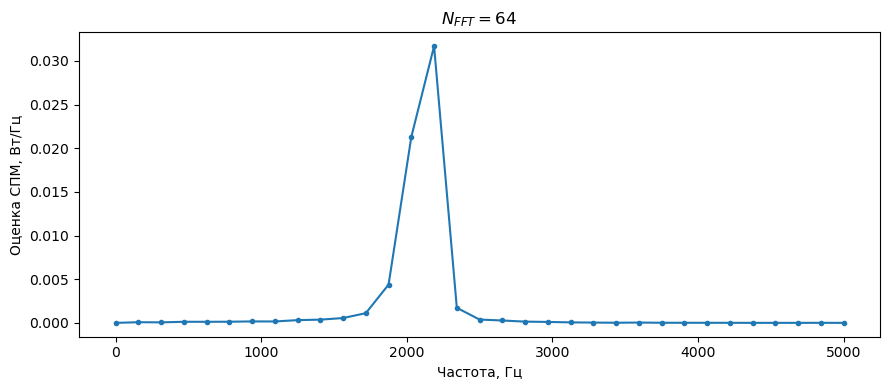

In [17]:
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=N, scaling='density')
plt.figure(figsize=[9, 4])
plt.plot(f, Pxx_den/2, '.-')
plt.title("$N_{FFT} = %i$" %N)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

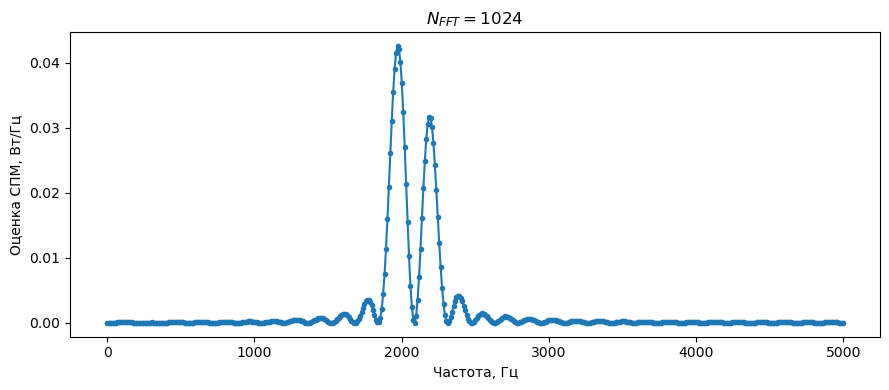

In [18]:
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=2**10, scaling='density')
plt.figure(figsize=[9, 4])
plt.plot(f, Pxx_den/2, '.-')
plt.title("$N_{FFT} = %i$" %2**10)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

## Выделение синусоиды из шума

Предположим, что требуется оценить СПМ случайного процесса
$${{x}_{\text{сл}}}[k]={A}\sin (2\pi {{f}_{1}}k\Delta t+{{\phi }_{1}})+e[k]$$
где 
* $A$ — известная амплитуда,
* $e[k]$ — дискретный белый шум c нулевым средним и дисперсией ${{\sigma }^{2}}$, 
* ${{f}_{1}}=2\ \text{кГц}$,  ${{f}_{\text{д}}}=1/\Delta t=10\ \text{Гц}$, 
* ${\phi }_{1}$ — случайная величина с равномерным распределением на отрезке $[0,2\pi ]$.

На частоте $f_1$

$M\left\{ \hat{G}\left( f_1 \right) \right\}=\Delta t\dfrac{{{A}^{2}}}{4U} |W(0)|^2 +\sigma^2 \ \Delta t$

$U=\int\limits_{-1/2}^{\text{1}/2}{{{\left| W(\nu ) \right|}^{2}}}d\nu =\sum\limits_{k=0}^{N-1}{{{w}^{2}}[k]}$


Для прямоугольного окна $W(0)=N=U$, где $N$ — длина окна. Тогда на частоте $f_1$

$M\left\{ \hat{G}\left( f_1 \right) \right\}=\Delta t  \left( \dfrac{{{A}^{2}}}{4}N+\sigma^2 \right)$

Истинная СПМ

$G(f)=\sigma^2 \ \Delta t + \dfrac{{{A}^{2}}}{4} \sum_{m=-\infty}^{\infty} \left( \delta (f-{{f}_{1}}+f_s m)+\delta (f+{{f}_{1}}+f_s m) \right)$


A^2 N / 4 =  16.0
sigma^2 =  400


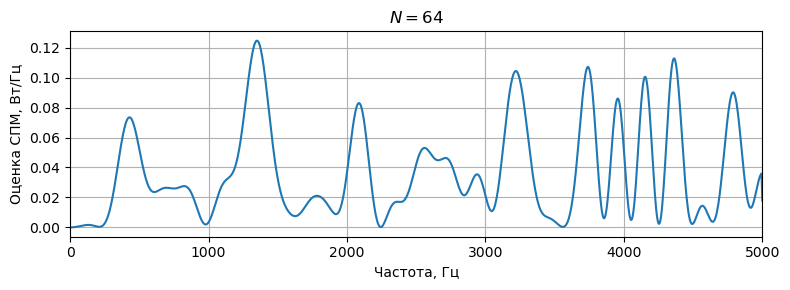

In [19]:
fs=10000
f1=2000
A=1
N=64 #*8
k=np.arange(N)
x=A*np.sin(2*np.pi*f1/fs*k)+np.random.normal(scale=20, size=N)

print("A^2 N / 4 = ", A**2*N/4)
print("sigma^2 = ", 400)

f, Pxx_den = signal.periodogram(x, fs=fs, window='boxcar', nfft=2**11, scaling='density')
plt.figure(figsize=[8, 3])
plt.grid()
plt.title("$N = %i$" %len(x))
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.xlim([0, fs/2])
plt.tight_layout()
#plt.savefig('psd_3.svg')
plt.show()

A^2 N / 4 =  16384.0
sigma^2  =  400


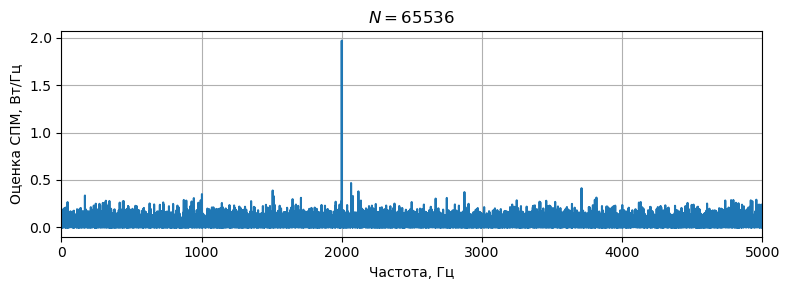

In [20]:
fs=10000
f0=2000
A=1
N=2**16
k=np.arange(N)

x=A*np.sin(2*np.pi*f0/fs*k)+np.random.normal(scale=20, size=N)

print("A^2 N / 4 = ", A**2*N/4)
print("sigma^2  = ", 400)

f, Pxx_den = signal.periodogram(x, fs=fs, window='boxcar', scaling='density')

plt.figure(figsize=[8, 3])
plt.title("$N = %i$" %len(x))
plt.grid()
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.xlim([0, fs/2])
plt.tight_layout()
#plt.savefig('psd_4.svg')
plt.show()

## Модифицированные периодограммы - использование окна

Оценка СПМ по методу Шустера (немодифицированная периодограмма)
$$\hat{G}(f)=\frac{\Delta t}{N}{{\left| \sum\limits_{k\ =\ 0}^{N-1}{x[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$ 
Модифицированная периодограмма:
$$\hat{G}(f)=\frac{\Delta t}{U}{{\left| \sum\limits_{k\ =\ 0}^{N-1}{w[k]x[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$ 
$$U=\sum_{k=0}^{N-1} |w[k]|^2$$

### Окна: различимость спектральных компонент / ложные периодичности

In [21]:
fs=10000
f0=2000
f1=2000+156.25*0.8
a1=5
a2=4
N=64
k=np.arange(N)

x=a1*np.sin(2*np.pi*f0/fs*k)+a2*np.sin(2*np.pi*f1/fs*k)+np.random.normal(scale=0.2, size=N)

In [22]:
U = sum(abs(signal.windows.blackman(N))**2)

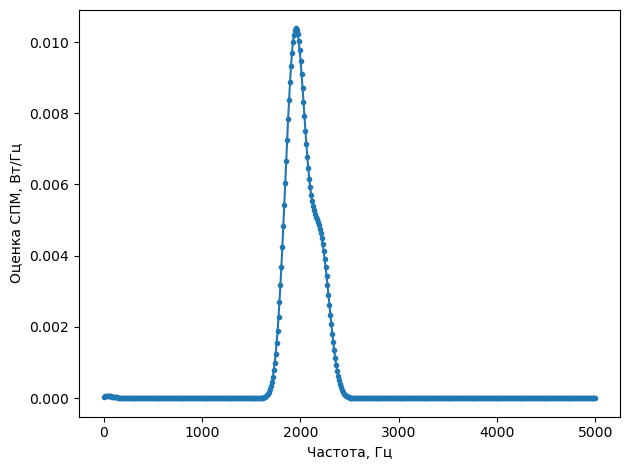

In [23]:
f, Pxx_den = signal.periodogram(x, fs=fs, window='blackman', nfft=2**10, scaling='density')
plt.figure()
plt.plot(f, Pxx_den/2, '.-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

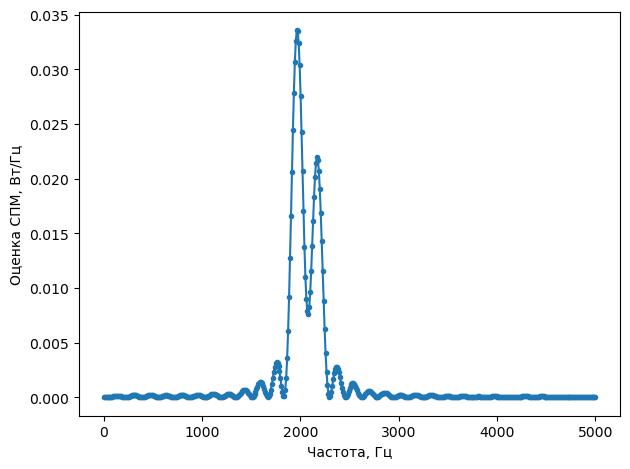

In [24]:
f, Pxx_den = signal.periodogram(x, fs=fs, window='boxcar', nfft=2**10, scaling='density')
plt.figure()
plt.plot(f, Pxx_den/2, '.-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

### Окна: маскировка слабых гармоник боковыми лепестками окна

In [25]:
fs=10000
f0=2000
f1=2390
a1=40
a2=1
a=4
N=128
k=np.arange(N)

x=a1*np.sin(2*np.pi*f0/fs*k)+a2*np.sin(2*np.pi*f1/fs*k)

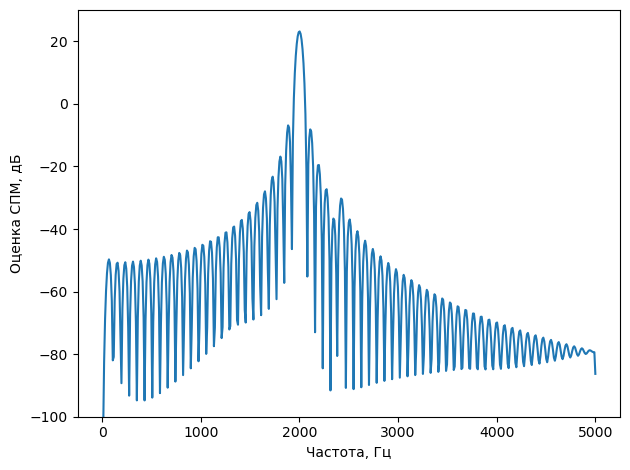

In [26]:
f, Pxx_den = signal.periodogram(x, fs=fs, window='boxcar', nfft=2**10, scaling='density')
plt.figure()
plt.plot(f, 10*np.log(Pxx_den), '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, дБ')
plt.ylim([-100, 30])
plt.tight_layout()

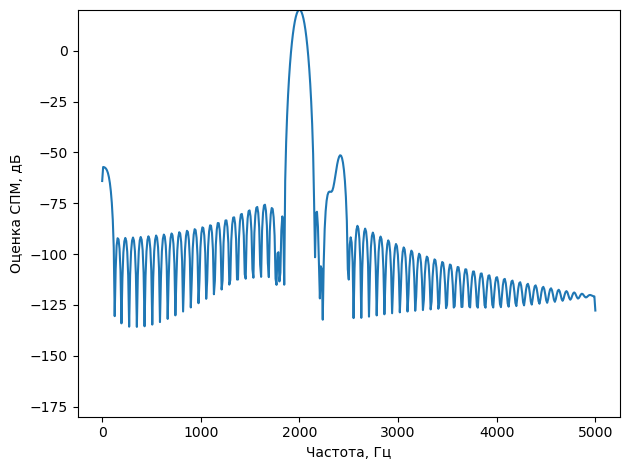

In [27]:
f, Pxx_den = signal.periodogram(x, fs=fs, window='hamming', nfft=2**10, scaling='density')
plt.figure()
plt.plot(f, 10*np.log(Pxx_den), '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, дБ')
plt.ylim([-180, 20])
plt.tight_layout()

## Метод Бартлетта оценки СПМ

* `window='boxcar' `
* `noverlap=0 `

Пусть заданы шаг дискретизации $\Delta t$ анализируемого процесса и число отсчетов $N$ действительной последовательности $x[k]$. Разделим последовательность $x[k]$ на $P$ неперекрывающихся сегментов по $D$ отсчетов в каждом, т. е. $N=P\cdot D$. Сегмент $p$ задается формулой:
$${{x}^{(p)}}[k]=x[pD+k]$$
Для каждого сегмента \[p\] вычисляется периодограмма:
$$\hat{G}{{}_{p}}(f)=\frac{\Delta t}{D}{{\left| \sum\limits_{k\ =\ 0}^{D-1}{{{x}^{(p)}}[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$
Вычисления по формуле производятся на некоторой сетке частот, для чего может быть использован алгоритм БПФ. 
Далее на этой сетке частот производится расчет усредненной оценки СПМ:
$$\hat{G}{{}_{B}}\left( f \right)=\frac{1}{P}\sum\limits_{p=0}^{P-1}{{{{\hat{G}}}_{p}}\left( f \right)}$$





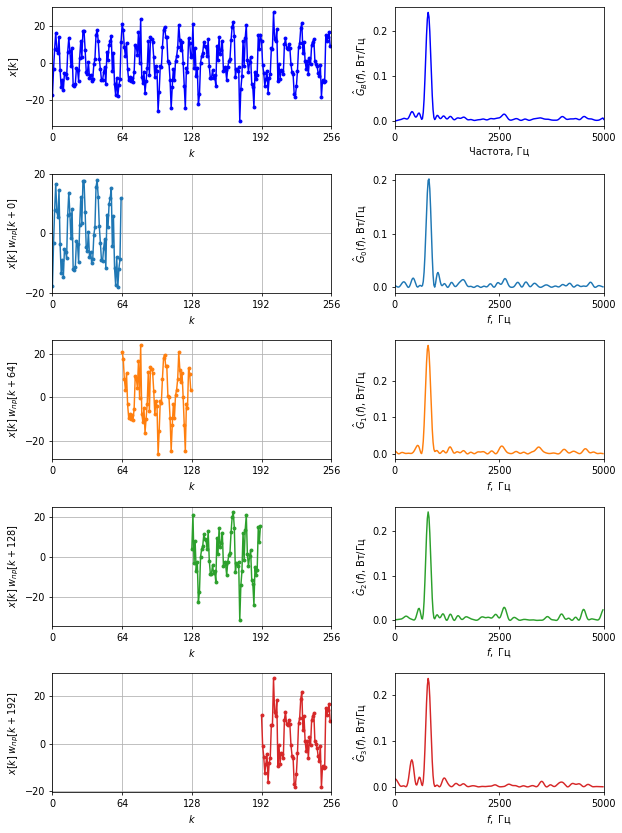

In [28]:
#@title 

fs=10000
f0=800
a1=12
N=256
k=np.arange(N)
x=a1*np.sin(2*np.pi*f0/fs*k)+np.random.normal(scale=7, size=N)

plt.figure(figsize=[9, 12], dpi=70)
nseg=N//64
nperseg=64
noverlap=0
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.yticks([-20, 0, 20])
plt.xticks([0, 64, 128, 128+64, 256])
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
#X_n=np.fft.fft(x)
#plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b', '.')
#plt.ylabel('$|X[n]|$')
#plt.xlabel('$f_n$, Гц')

f, Pxx_den = signal.welch(x, fs=fs, window='boxcar', nperseg=64, noverlap=0, nfft=512, scaling='density')
plt.plot(f, Pxx_den/2, '-b')
plt.xlabel('Частота, Гц')
plt.ylabel('$\hat{G}_B (f)$, Bт/Гц')
plt.xticks([0, fs//4, fs//2])
plt.yticks([0, 0.1, 0.2])
plt.xlim([0, fs//2])

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xticks([0, 64, 128, 128+64, 256])
    plt.xlim([0, 256])
    plt.yticks([-20, 0, 20])
    #plt.ylabel('$x^{(%i)}[k]$' %u)
    plt.ylabel('$x[k]\;w_{пр}[k+%i]$' %(u*(nperseg-noverlap)))
    plt.xlabel('$k$')
    plt.grid()
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=abs(np.fft.fft(y, 512))**2/64/fs
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '-C%i'  %u)
    plt.ylabel('$\hat{G}_{%i} (f)$, Bт/Гц' %u)
    plt.xlabel('$f,$ Гц')
    plt.xticks([0, fs//4, fs//2])
    plt.yticks([0, 0.1, 0.2])
    plt.xlim([0, fs//2])
    plt.tight_layout()
# plt.savefig('psd_5.svg')

In [29]:
fs=10000
f0=800
a1=12
N=256
k=np.arange(N)
x=a1*np.sin(2*np.pi*f0/fs*k)+np.random.normal(scale=7, size=N)

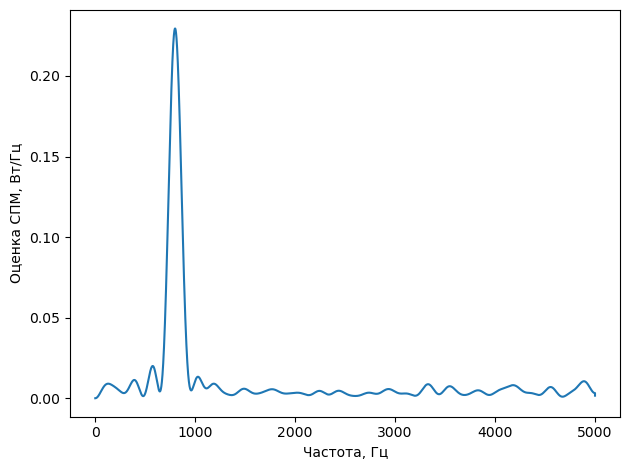

In [30]:
f, Pxx_den =  signal.welch(x,  fs=fs, window='boxcar', nperseg=64, noverlap=0, nfft=2**18, return_onesided=True, scaling='density')
plt.figure()
plt.plot(f, Pxx_den/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

 ## Метод Уэлча оценки СПМ

Пусть заданы шаг дискретизации $\Delta t$ анализируемого процесса и число отсчетов $N$ действительной последовательности $x[k]$.  Разделим последовательность $x[k]$ на $P$ перекрывающихся сегментов по $D$ отсчетов в каждом, следующих с шагом $S$ ($S\le D$). Сегмент$p$ задается формулой:
	$${{x}^{(p)}}[k]=x[pS+k]$$	
Число $P$ соответствует целой части числа $(N-D)/S+1$. Для каждого сегмента вычисляется оценка 
	$$\hat{G}{{}_{p}}(f)=\frac{\Delta t}{U}{{\left| \sum\limits_{k\ =\ 0}^{D-1}{w[k]{{x}^{(p)}}[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$	
где
	$$U=\sum\limits_{k=0}^{D-1}{{{w}^{2}}[k]}=\int\limits_{-1/2}^{1/2}{{{\left| W(\nu ) \right|}^{2}}}d\nu $$	
Множитель $U$ необходимо для того, чтобы оценка была несмещенной. Далее для выбранной сетки частот производится усреднение: 
	$$\hat{G}{{}_{W}}\left( f \right)=\frac{1}{P}\sum\limits_{p=0}^{P-1}{{{{\hat{G}}}_{p}}\left( f \right)}$$	


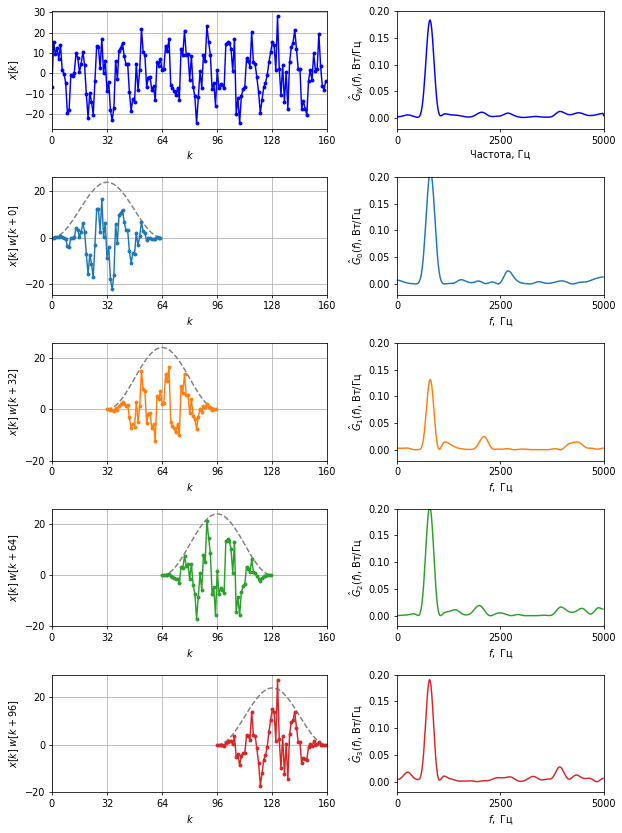

In [31]:
#@title 

fs=10000
f0=800
a1=12
N=256
k=np.arange(N)
x=a1*np.sin(2*np.pi*f0/fs*k)+np.random.normal(scale=7, size=N)

nseg=N//64
x2=x+0
x=x[0:160]
w=signal.windows.hann(M=64, sym=False)
U=sum(w**2)


plt.figure(figsize=[9, 12], dpi=70)
w=signal.windows.hann(M=64, sym=False)
U=sum(w**2)
nseg=N//64
nperseg=64
noverlap=32
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.xticks([0, 32, 64, 96, 128, 128+32])
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
#X_n=np.fft.fft(x)
#plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b', '.')
#plt.ylabel('$|X[n]|$')
#plt.xlabel('$f_n$, Гц')

f, Pxx_den = signal.welch(x, fs=fs, window='hann', nperseg=64, nfft=512, scaling='density')
plt.plot(f, Pxx_den/2, '-b')
plt.xlabel('Частота, Гц')
plt.ylabel('$\hat{G}_W (f)$, Bт/Гц')
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20])
plt.ylim([-0.02, 0.20])
plt.xlim([0, fs//2])
plt.xticks([0, fs//4, fs//2])

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.hann(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), U*signal.windows.hann(nperseg, sym=False), 
             '--', color='gray')
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xticks([0, 32, 64, 96, 128, 128+32])
    plt.xlim([0, 160])
    plt.yticks([-20, 0, 20])
    plt.ylabel('$x[k]\;w[k+%i]$' %(u*noverlap))
    plt.xlabel('$k$')
    plt.grid()
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=abs(np.fft.fft(y, 512))**2/fs/U
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '-C%i'  %u)
    plt.ylabel('$\hat{G}_{%i} (f)$, Bт/Гц' %u)
    plt.xlabel('$f,$ Гц')
    plt.xticks([0, fs//4, fs//2])
    plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20])
    plt.ylim([-0.02, 0.20])
    plt.xlim([0, fs//2])
    plt.tight_layout()
#plt.savefig('psd_7.svg')

In [32]:
fs=10000
f0=800
a1=12
N=256
k=np.arange(N)
x=a1*np.sin(2*np.pi*f0/fs*k)+np.random.normal(scale=7, size=N)

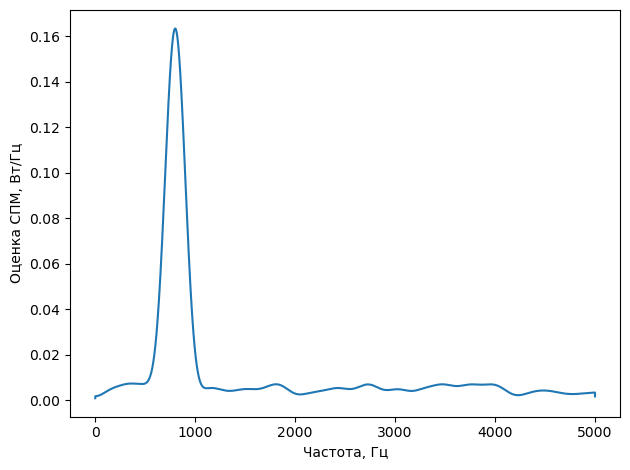

In [33]:
f, Pxx_den =  signal.welch(x,  fs=fs, window='hann', nperseg=64, noverlap=32, nfft=2**18, return_onesided=True, scaling='density')
plt.figure()
plt.plot(f, Pxx_den/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

## Периодограмма Даньелла

Периодограмма Даньелла строиться на основе сглаживания исходной периодограммы $\hat{G}(f_k)$ — ее усреднения по $2K+1$ соседней частоте, симметрично расположенной относительно исходной:

$\hat{G}_{Daniell} (f_i) = \dfrac{1}{2K+1} \sum \limits_{k=i-K}^{i+K}\hat{G}(f_k)$, $i=K, K+1, ..., N-1-K$.

$f_k=k/N$, $f_i=i/N$.

Для вычисления периодограммы Даньелла исходную периодограмму $\hat{G}(f_k)$ дополняют $K$ отсчетами справа и слева так, чтобы она была периодична. 

Один из способом вычисления периодограммы Даньелла заключается в определении реакции фильтра скользящего среднего (MA) с импульсной характеристикой 
$$h[k]=\dfrac{1}{2K+1} \sum \limits_{m=0}^{2K} \mathbf{1}[k-m]$$
на входное воздействие в виде отсчетов исходной периодограммы длиной $N+2K$. Первые $2K$ отчетов выхода фильтра в таком случае следует отбросить. 


**Пример**. Рассмотрим периодограмму, построеннную по реализации случайного процесса 
$$x_{сл}[k]=a_1 \sin \left( 2 \pi \dfrac{f_0}{f_s} k\right) + e[k],$$
где $a_1=5$, $f_0=2$ кГц, $f_s=10$ кГц, $e[k]$ — дискретный белый шум с дисперсией $\sigma^2$. 

In [34]:
fs=10000
f0=2000
a1=5
N=1024*64
k=np.arange(N)
x=a1*np.sin(2*np.pi*f0/fs*k)+np.random.normal(scale=8, size=N)

In [35]:
f, Pxx = signal.periodogram(x, fs=fs, scaling='density')

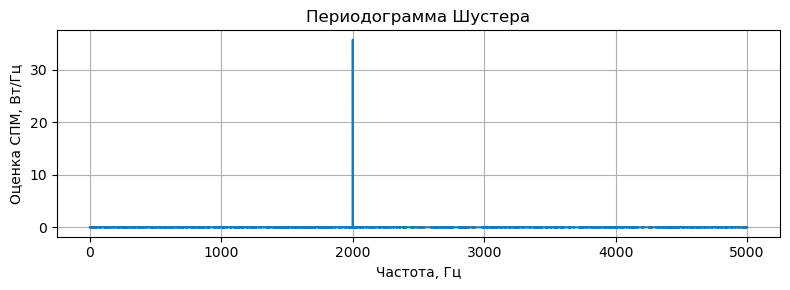

In [36]:
plt.figure(figsize=[8, 3])
plt.plot(f, Pxx/2)
plt.title("Периодограмма Шустера")
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.grid()
# plt.xlim([3000, 3050])
# plt.ylim([0, 0.1])
plt.tight_layout()
plt.show()

Дополним периодограмму Шустера отсчетами, учитывая  периодичность СПМ. Это позволит производить усреднение на границах интервала (вблизи $0$ и вблизи $f_s/2$).  

In [37]:
K=20
G=np.hstack([Pxx[K: 0 :-1], Pxx, Pxx[(N//2-1): (N//2-1-K) :-1]])

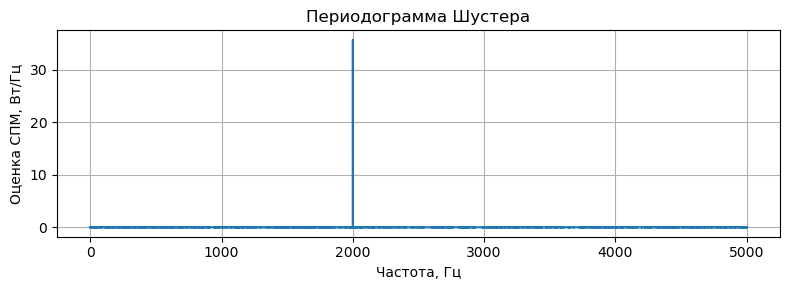

In [38]:
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(-K, N//2+1+K, 1))/N, G/2, '-')
plt.title("Периодограмма Шустера")
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.grid()
# plt.xlim([3000, 3050])
# plt.ylim([0, 0.1])
plt.tight_layout()
plt.show()

Один из способом вычисления периодограммы Даньелла заключается в определении реакции фильтра скользящего среднего (MA) с импульсной характеристикой 
$$h[k]=\dfrac{1}{2K+1} \sum \limits_{m=0}^{2K} \mathbf{1}[k-m]$$
на входное воздействие в виде отсчетов исходной периодограммы длиной $N+2K$. Первые $2K$ отчетов выхода фильтра в таком случае следует отбросить. 

In [39]:
h=np.ones(2*K+1)/(2*K+1)
Pxx_Daniell = signal.convolve(h, G)
Pxx_Daniell=Pxx_Daniell[2*K:2*K+N//2+1:1]

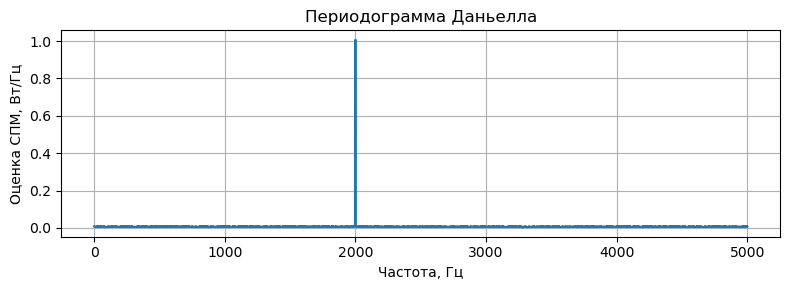

In [40]:
plt.figure(figsize=[8, 3])
plt.plot(f, Pxx_Daniell/2)
plt.title("Периодограмма Даньелла")
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.grid()
# plt.xlim([3000, 3050])
# plt.ylim([0, 0.1])
plt.tight_layout()
plt.show()

In [41]:
# Примечание. Эффект уменьшения изрезанности периограммы можно пронаблюдать, 
# если раскоментировать в построении графиков строки 
# plt.xlim([3000, 3050])
# plt.ylim([0, 0.1])